
## checking notebook's gpu status


In [1]:
!nvidia-smi

Fri Jan 20 21:24:13 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    52W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package. We will install it via pip

In [4]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.11 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (A100-SXM4-40GB, 40536MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 23.5/166.8 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image


downloading the dataset using roboflow's api


In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

#pip installing roboflow and import

!pip install roboflow
from roboflow import Roboflow

#downloading the dataset using roboflow's api

rf = Roboflow(api_key="privateip")
project = rf.workspace("user").project("project")
dataset = project.version(1).download("yolov8")


/content/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 KB 15.9 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=606109c1821caa27fd9da928afeb717bb3ad482f86e93898ef18976e5dbc45de
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.14
    Uninstalling urllib3-1.26.14:
      Successfully uninstalled urllib3-1.26.14
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
  

Extracting Dataset Version Zip to comp1-1-2 in yolov8:: 100%|██████████| 15625/15625 [00:05<00:00, 2706.57it/s]


In [7]:

!unzip /content/gdrive/MyDrive/test.zip > /dev/null 


## Custom Training

In [8]:

%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=928


/content
100% 21.5M/21.5M [00:02<00:00, 9.58MB/s]

Ultralytics YOLOv8.0.11 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (A100-SXM4-40GB, 40536MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/comp1-1-2/data.yaml, epochs=100, patience=50, batch=16, imgsz=928, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=F

In [9]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch2.jpg
confusion_matrix.png				    train_batch39780.jpg
events.out.tfevents.1674250426.964d2ee688c2.4547.0  train_batch39781.jpg
F1_curve.png					    train_batch39782.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
predictions.json				    val_batch1_labels.jpg
R_curve.png					    val_batch1_pred.jpg
results.csv					    val_batch2_labels.jpg
results.png					    val_batch2_pred.jpg
train_batch0.jpg				    weights
train_batch1.jpg


/content


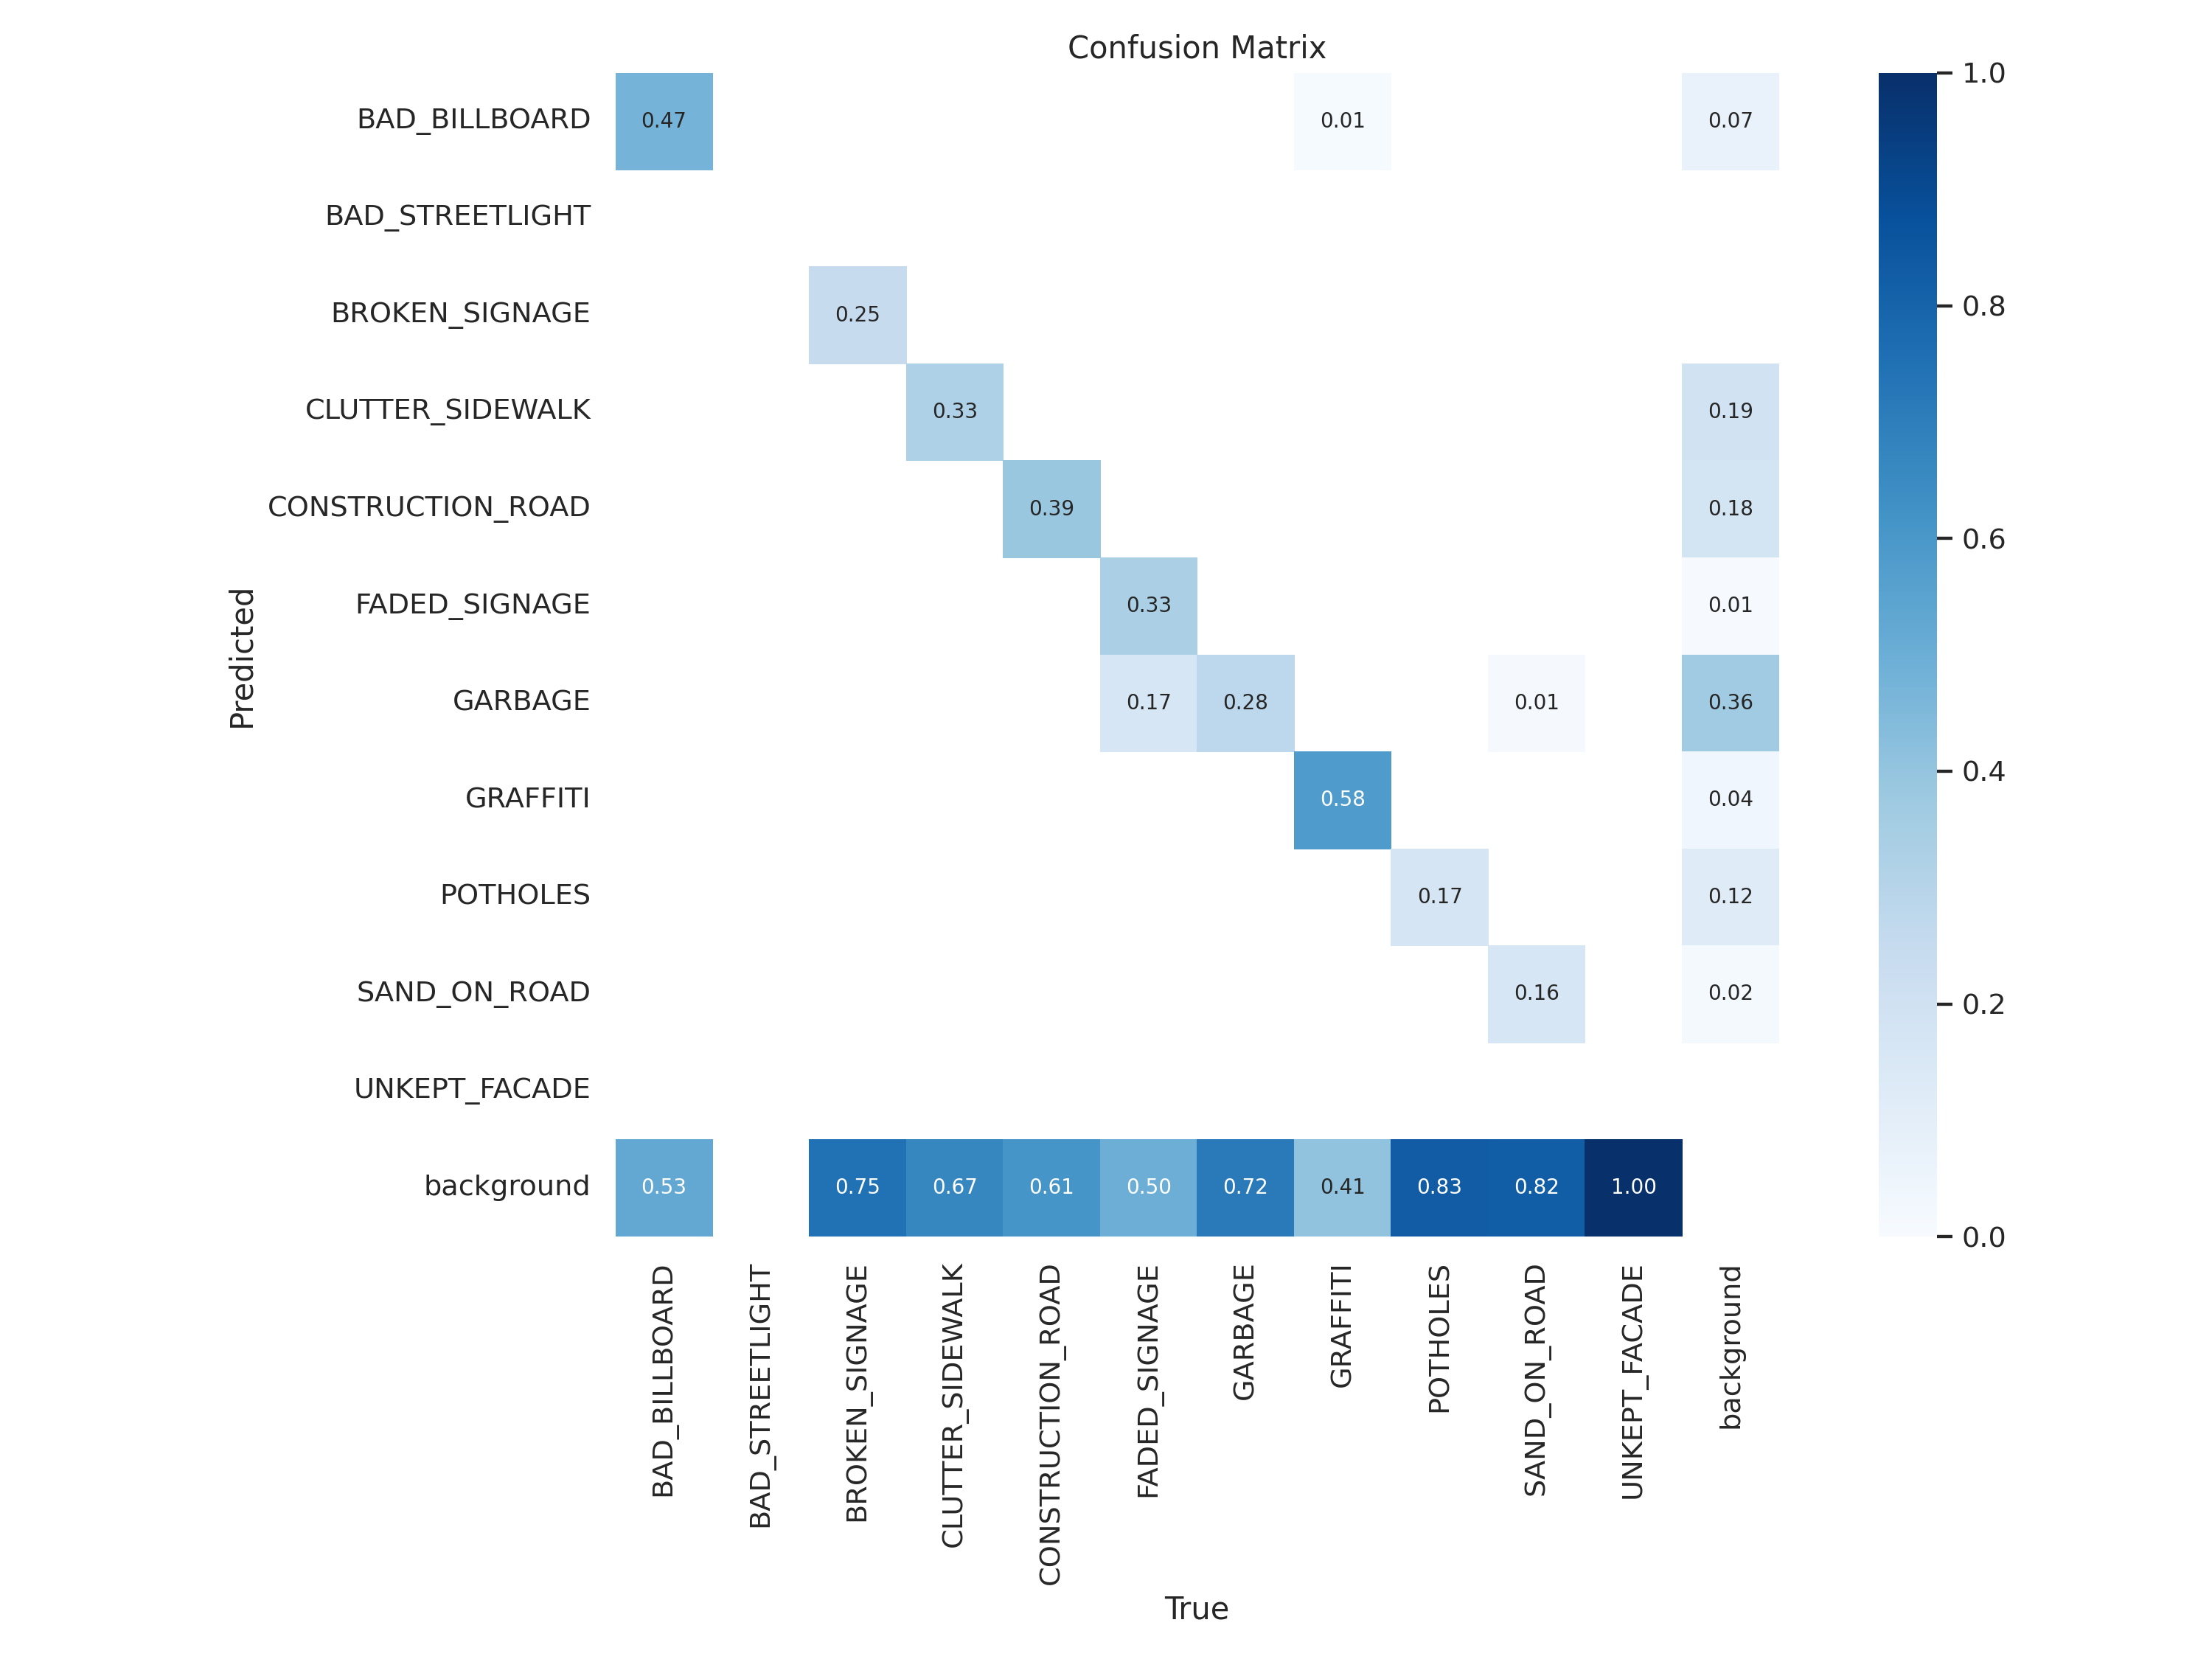

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


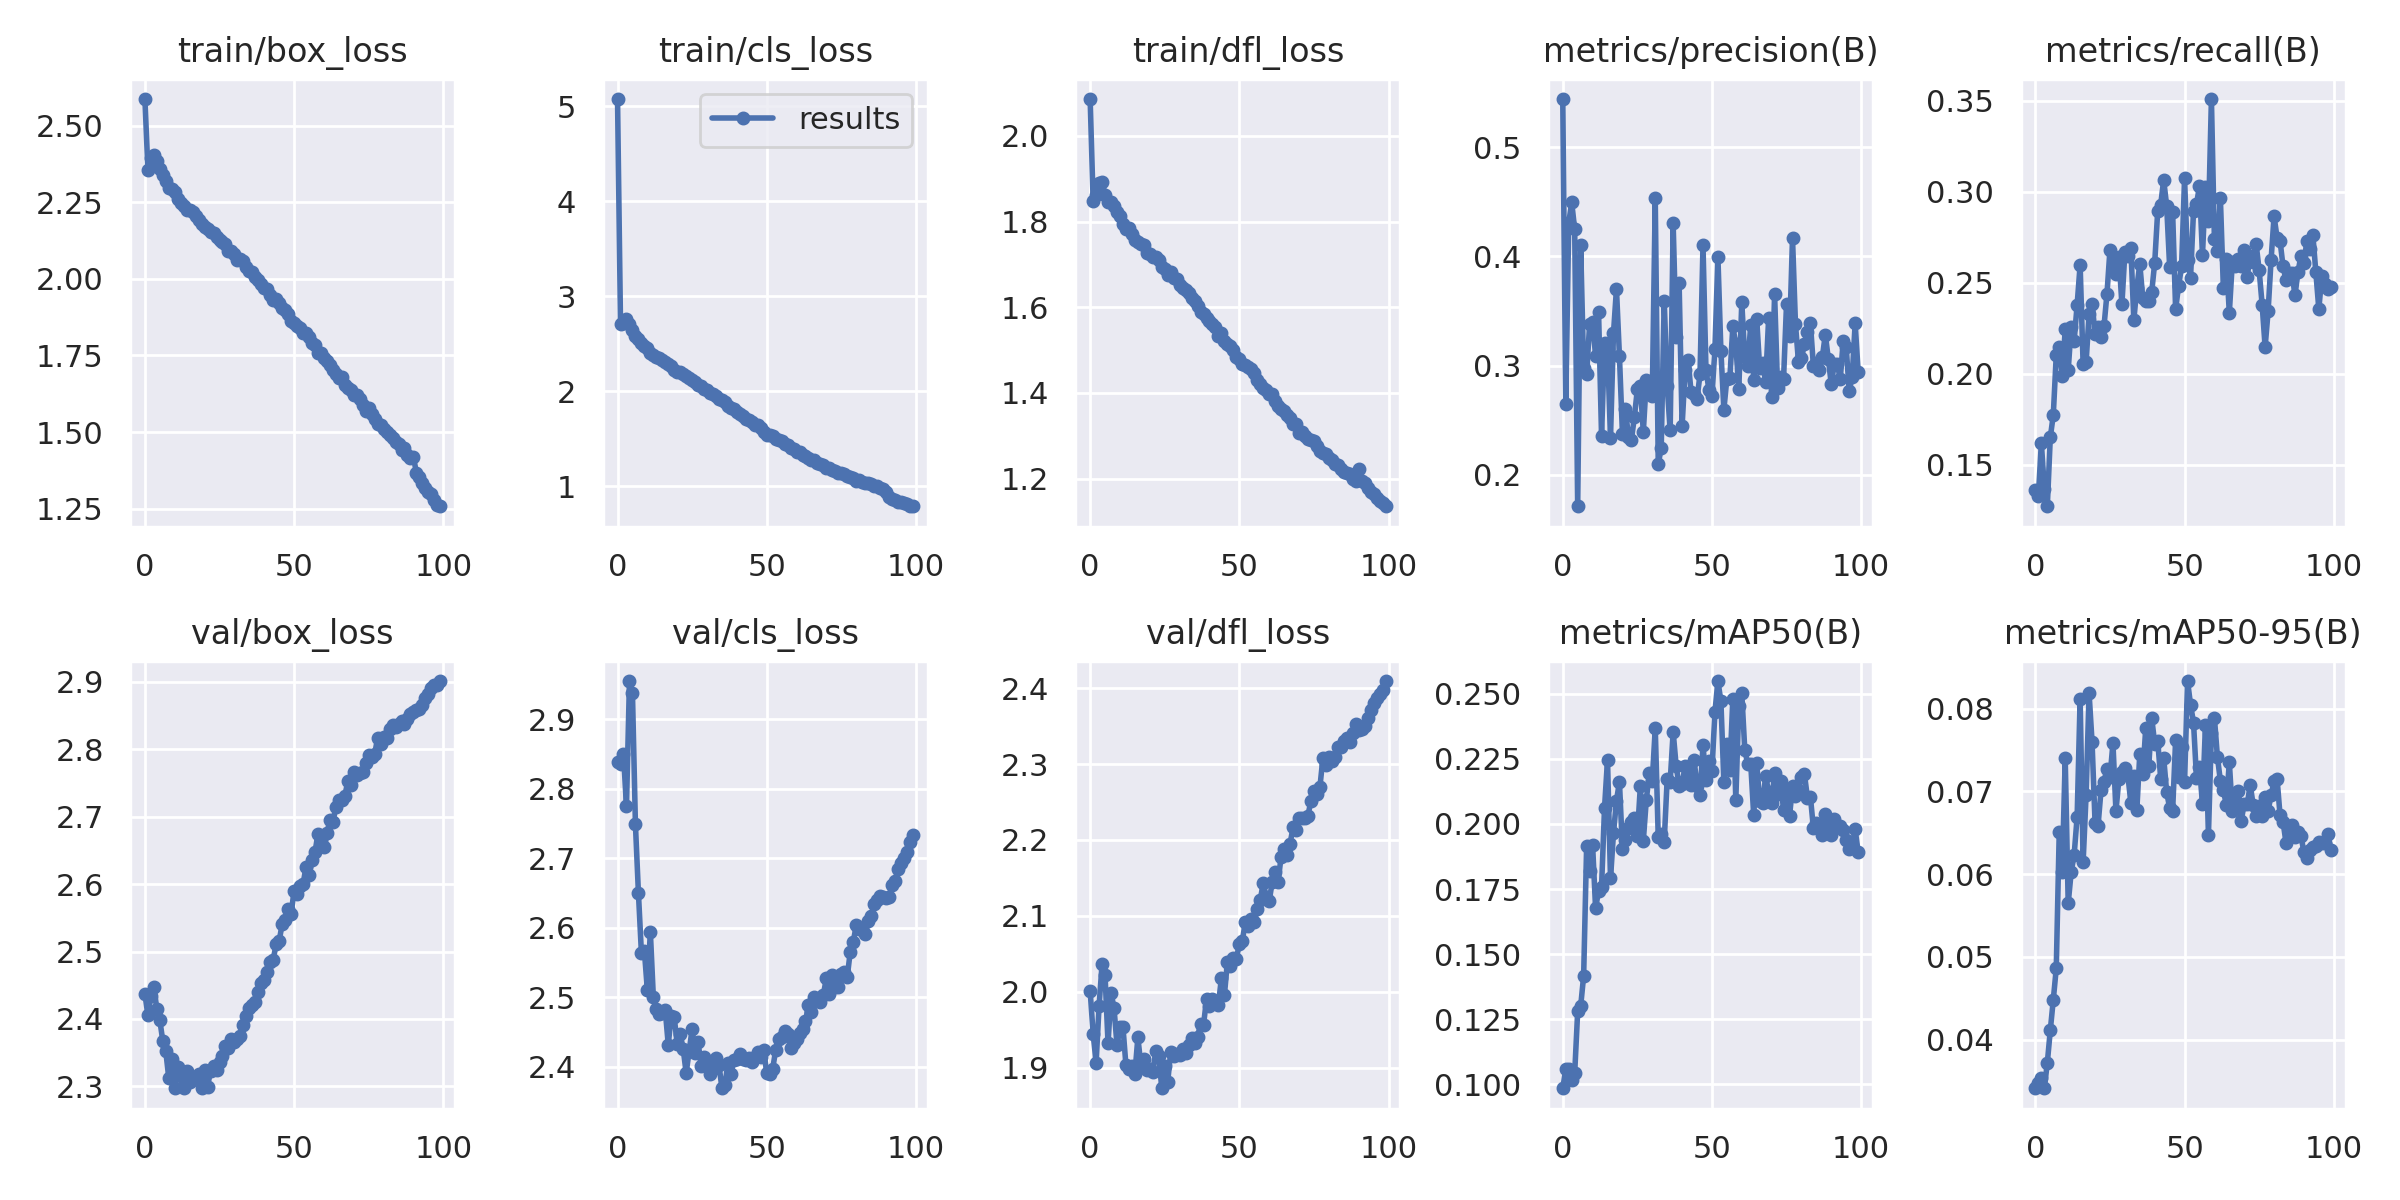

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


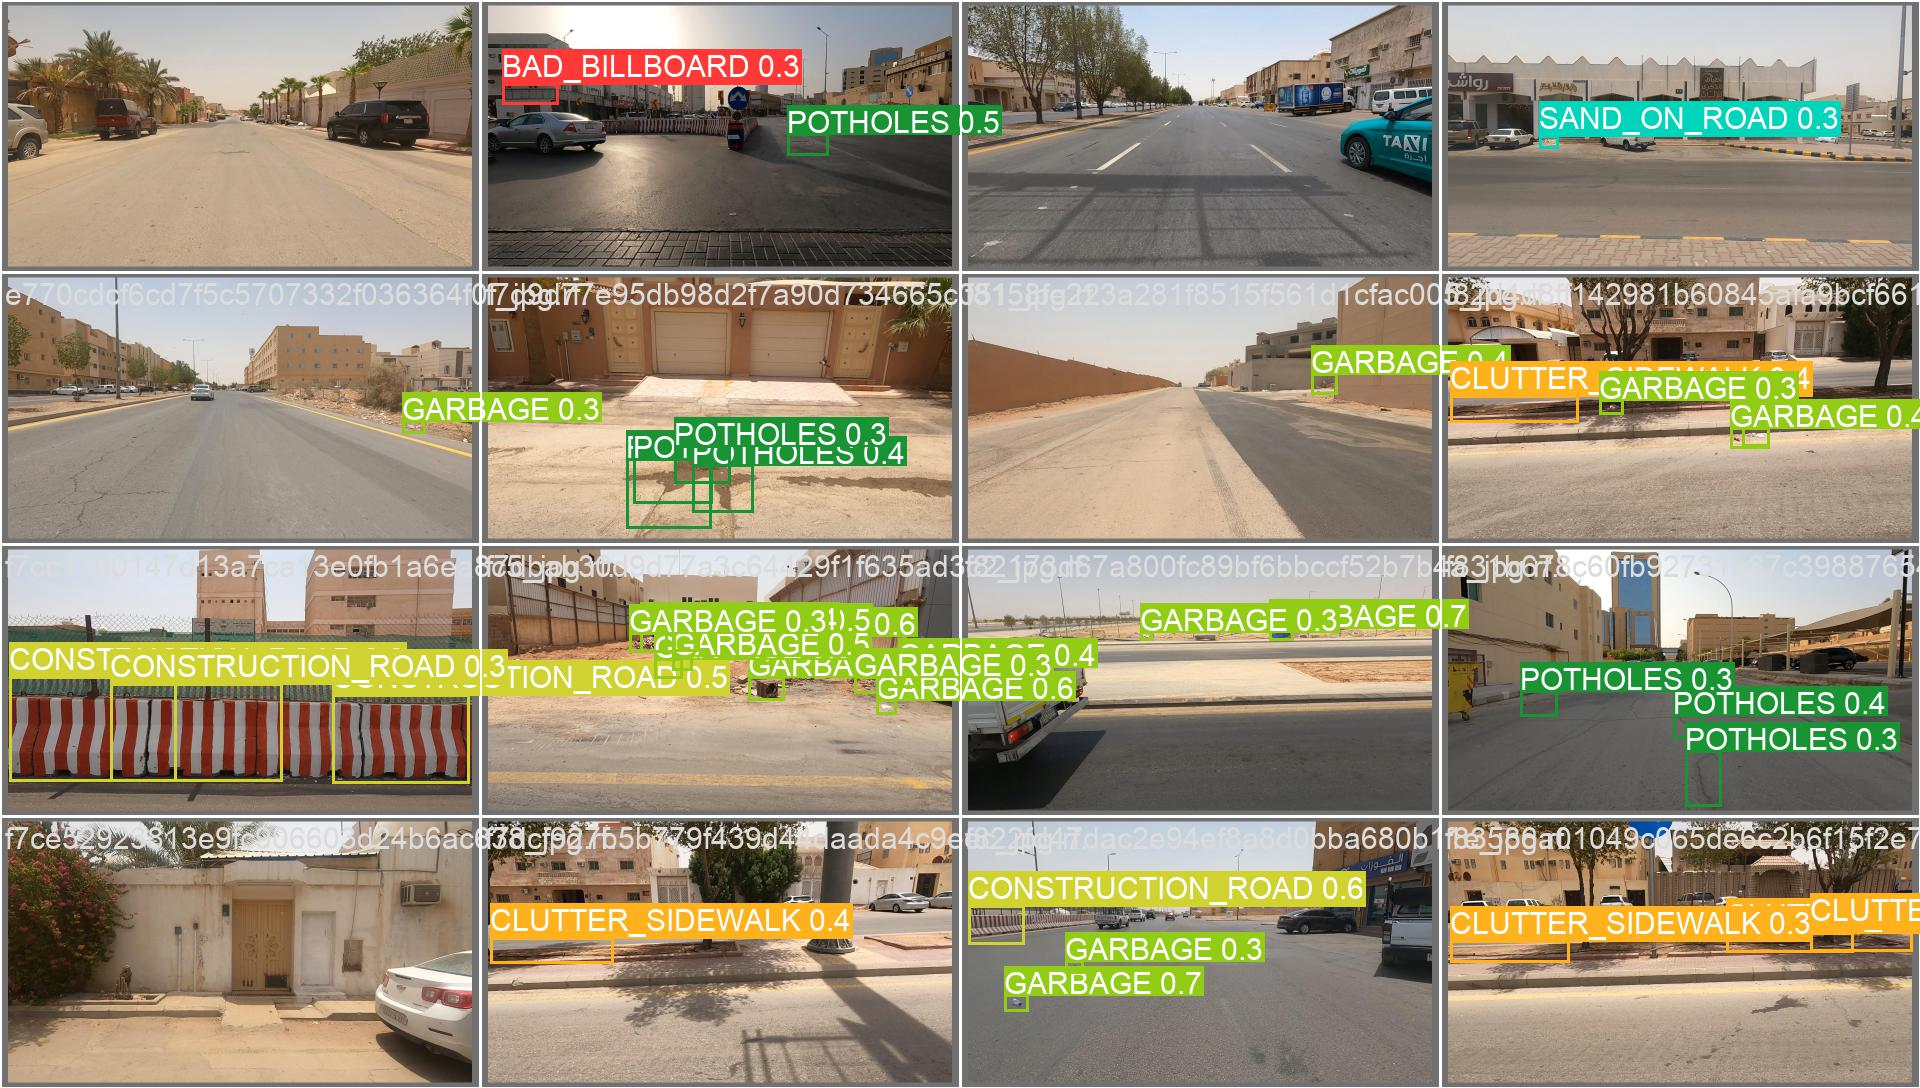

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [13]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.11 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (A100-SXM4-40GB, 40536MiB)
Fusing... 
Model summary: 168 layers, 11129841 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/comp1-1-2/valid/labels.cache... 750 images, 0 backgrounds, 0 corrupt: 100% 750/750 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 47/47 [00:07<00:00,  6.30it/s]
                   all        750       1947      0.251      0.268      0.213     0.0719
         BAD_BILLBOARD        750        150      0.396      0.427      0.369      0.144
        BROKEN_SIGNAGE        750          4      0.218       0.25      0.249        0.1
      CLUTTER_SIDEWALK        750        239       0.29      0.397      0.213     0.0648
     CONSTRUCTION_ROAD        750        248      0.317      0.391      0.295     0.0876
         FADED_SIGNAGE        750          6          0          0      0.016    0.00802
               GARBAGE

## Predict on chosen files 

In [14]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.35 source=/content/datasets/test/*.jpg save_txt=true

Ultralytics YOLOv8.0.11 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (A100-SXM4-40GB, 40536MiB)
Fusing... 
Model summary: 168 layers, 11129841 parameters, 0 gradients, 28.5 GFLOPs
image 1/2092 /content/datasets/test/006e04a34f54d116f6aff2bb31cb320c.jpg: 384x640 1 GARBAGE, 18.9ms
image 2/2092 /content/datasets/test/006e70d6a51af3e670bbe712a83aa1c5.jpg: 384x640 1 GARBAGE, 13.9ms
image 3/2092 /content/datasets/test/0081b25823f23a536c9f1952491db636.jpg: 384x640 1 GARBAGE, 12.1ms
image 4/2092 /content/datasets/test/00b48429c1382cc7d1c72926acedbaa7.jpg: 384x640 1 CONSTRUCTION_ROAD, 11.9ms
image 5/2092 /content/datasets/test/00b5fc2d3153637e65a35363295e14ba.jpg: 384x640 1 BAD_BILLBOARD, 14.3ms
image 6/2092 /content/datasets/test/00bce25b1d3a3422bb366a12e3e9ac6a.jpg: 384x640 1 GARBAGE, 12.0ms
image 7/2092 /content/datasets/test/00df7d46d661eba176ccc167f2763585.jpg: 384x640 12.0ms
image 8/2092 /content/datasets/test/00f12b9ba667d2c9e60aabf56afc5c6c.jpg: 384x640 1 POTHOLES, 13.3ms
image 9/2092 /con

/content


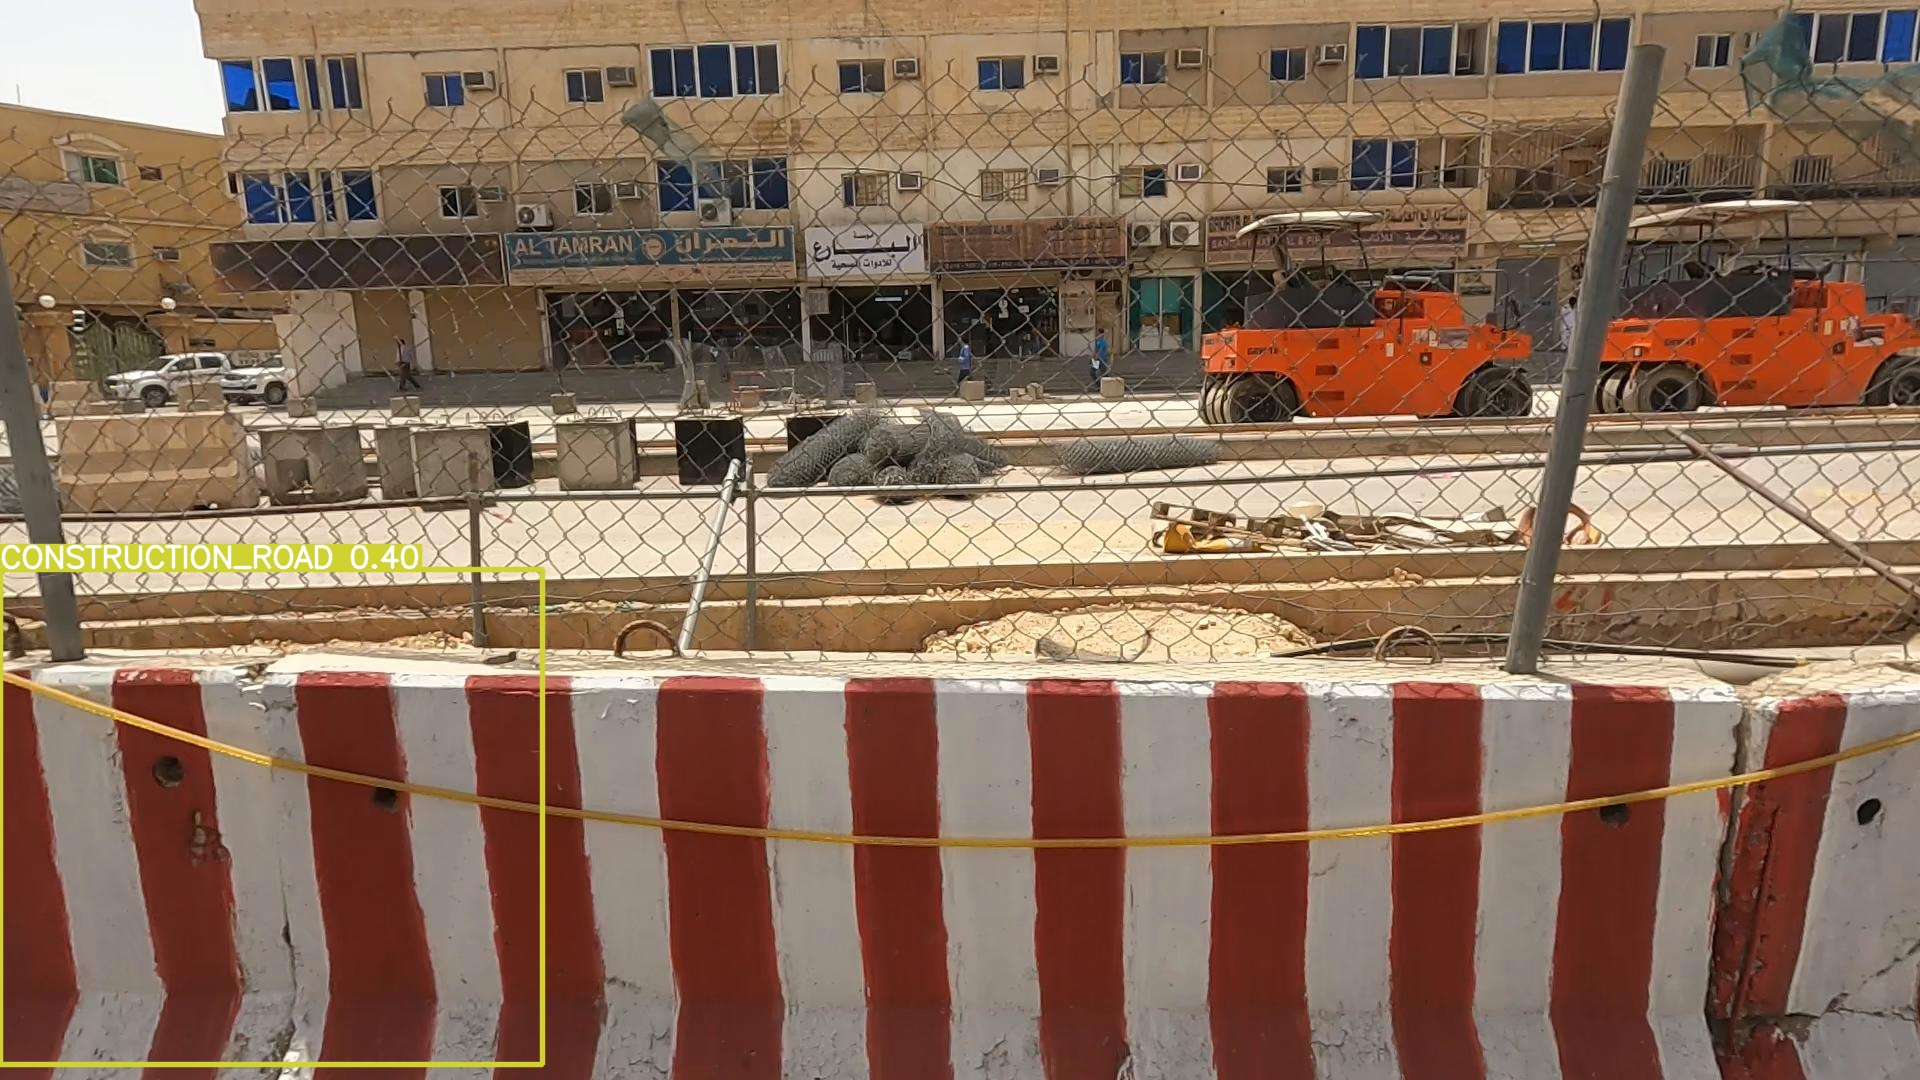

In [15]:
%cd {HOME}
Image(filename='/content/runs/detect/predict/00b48429c1382cc7d1c72926acedbaa7.jpg', height=600)

In [16]:
!zip -r /content/datasets/yolo_format_sample.zip /content/runs/detect/predict/labels

  adding: content/runs/detect/predict/labels/ (stored 0%)
  adding: content/runs/detect/predict/labels/a9fe4831f30122e977130e6440efdf6d.txt (deflated 39%)
  adding: content/runs/detect/predict/labels/1288bb76e741271c7e89582a6b533d47.txt (deflated 15%)
  adding: content/runs/detect/predict/labels/7ed7cf0221bcb0e45f5472d1c67d78d1.txt (deflated 8%)
  adding: content/runs/detect/predict/labels/f3021b5c8f15ae3193ab2513fad348b6.txt (deflated 8%)
  adding: content/runs/detect/predict/labels/3887cf8d39e67c94041c9969d8dd5477.txt (deflated 13%)
  adding: content/runs/detect/predict/labels/1aea650e4c165ce54c077c04d3d1bf51.txt (deflated 6%)
  adding: content/runs/detect/predict/labels/8d6f1d5ae2c1467cc07b6a6574423fcb.txt (deflated 25%)
  adding: content/runs/detect/predict/labels/515ff452e7f9f4495372f038ef17ea20.txt (deflated 28%)
  adding: content/runs/detect/predict/labels/0bd806a66f1d4e4302b354c34baca077.txt (deflated 8%)
  adding: content/runs/detect/predict/labels/e82186b0c9ad645974a227722ef7

In [17]:
!cp "/content/datasets/yolo_format_sample.zip" "/content/gdrive/MyDrive"